In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os

In [2]:
def ReLU(x):
    return np.maximum(x, 0)

def compute_recurrent_input(theta, firing_rates, thetas_i, J_0, J_2):
    """
    theta: preferred orientation of the neuron
    thetas_i and firing_rates: preferred orientations and respective firing rates of neurons in the population
    """
    rec_input = np.sum((J_0 + J_2 * np.cos(2 * (theta - thetas_i))) * firing_rates) / len(firing_rates)
    return rec_input

def compute_thalamic_input(theta, c, epsilon, A, theta_cue=0):
    """
    theta: preferred orientation of the neuron
    theta_cue: peak of thalamic input
    c: contrast of visual stimulus
    epsilon: parameter that expresses the tuning of the thalamic input (input anisotropy): epsilon = 0 - all neurons in population receive the same input, epsilon 
    A: amplitude (Hz)
    """
    return A * c * (1 - epsilon + epsilon * np.cos(2 * (theta - theta_cue)))

In [3]:
def simulate_and_plot_ring_model(
    theta_cue = 0, # orientation of input stimulus
    J_0 = -7.3,
    J_2 = 11,
    A = 40, # Hz
    epsilon = 0.1,
    a = 2, # or 5 (Hz)
    theta_0 = 0, # or np.pi / 4.
    num_of_neurons = 100, # number of neurons in the population
    total_time = 200, # ms
    dt = 0.01, # ms
    tau = 5, # ms (was not provided in the task description, but this value was mentioned in Fig. 2 of original paper)
    plot_and_savefigs=True
):
    
    contrasts = [0.1, 0.2, 0.4, 0.8]
    steady_states = {c: None for c in contrasts}
    indices = np.arange(1, num_of_neurons + 1)
    thetas_i = np.pi / num_of_neurons * indices - 0.5 * np.pi  # preferred orientations of the population
    firing_rates = a * np.cos(2 * (thetas_i - theta_0)) # initialising firing rates

    time_steps = np.linspace(0, total_time, int(total_time / dt + 1))  # creating timespace with dt=0.01 ms
    
    for c in contrasts:
        firing_rates_over_time = np.zeros(shape=(num_of_neurons, len(time_steps)))
        thalamic_input = compute_thalamic_input(thetas_i, c, epsilon, A, theta_cue)
    
        firing_rates_over_time[:, 0] = firing_rates
        with tqdm(range(len(time_steps)), desc="Timestep", leave=False) as timestep:
            for idx in timestep:
                thresholded_inputs = ReLU(thalamic_input + np.array([compute_recurrent_input(theta, firing_rates_over_time[:, idx], thetas_i, J_0, J_2) for theta in thetas_i]))
                df = (-firing_rates_over_time[:, idx] + thresholded_inputs) * (dt / tau)
                if idx < len(time_steps) - 1:
                    firing_rates_over_time[:, idx + 1] = firing_rates_over_time[:, idx] + df
    
            # plot dynamics of firing rate over time
            if plot_and_savefigs:
                fig, axs = plt.subplots(figsize=(12, 6), tight_layout = True)
                # img = axs.imshow(firing_rates_over_time[:, ::100], aspect='auto', cmap='viridis',
                #                 origin='lower',
                #                 extent=[0, 1000,
                #                         0, num_of_neurons])
                img = axs.imshow(firing_rates_over_time[:, ::100], aspect='auto', cmap='viridis',
                                origin='lower',
                                extent=[0, total_time,
                                        0, num_of_neurons])
                cbar = plt.colorbar(img)
                cbar.set_label('Firing Rate (Hz)', fontsize=15)
                axs.set_xlabel('Time (ms)', fontsize=15)
                axs.set_ylabel('Neuron idx', fontsize=15)
                axs.set_title(f'Dynamics of population activity in time for c={c}, $J_{0}$={J_0}, $J_{2}$={J_2}, A={A} Hz, $\epsilon$={epsilon}', fontsize=15, pad=0.8)
                axs.xaxis.set_tick_params(labelsize=15)
                axs.yaxis.set_tick_params(labelsize=15)
                output_dir = './plots/'
                os.makedirs(output_dir, exist_ok=True)
                plt.savefig(os.path.join(output_dir, f'dynamics_for_c_{c}_J_0_{J_0}_J_2_{J_2}_A_{A}_epsilon_{epsilon}.png'), dpi=300)
                plt.show()
            steady_states[c] = firing_rates_over_time[:, -1]
        timestep.close()

    # plot output firing rate for different contrasts
    if plot_and_savefigs:
        fig, axs = plt.subplots(tight_layout = True)
        colors = {0.1: "#cccccc", 0.2: "#969696", 0.4: "#636363", 0.8: "#252525"}
        for c in contrasts:
            axs.plot(thetas_i * 180 / np.pi, steady_states[c], label=f"c={c}", c=colors[c])
        axs.set_xticks([-90, -40, -20, 0, 20, 40, 90], [-90, -40, -20, 0, 20, 40, 90])
        axs.set_yticks([0, 20, 40, 60, 80], [0, 20, 40, 60, 80])
        axs.set_xlabel(r'$\theta$ (deg)', fontsize=20)
        axs.set_ylabel(r'$r(\theta)$ (Hz)', fontsize=20)
        axs.xaxis.set_tick_params(labelsize=15)
        axs.yaxis.set_tick_params(labelsize=15)
        axs.legend(fontsize=20)
        plt.savefig(os.path.join(output_dir, f'output_firing_rate_steady_state_for_J_0_{J_0}_J_2_{J_2}_A_{A}_epsilon_{epsilon}.png'), dpi=300)
        plt.show()
    return steady_states

## Question 1

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

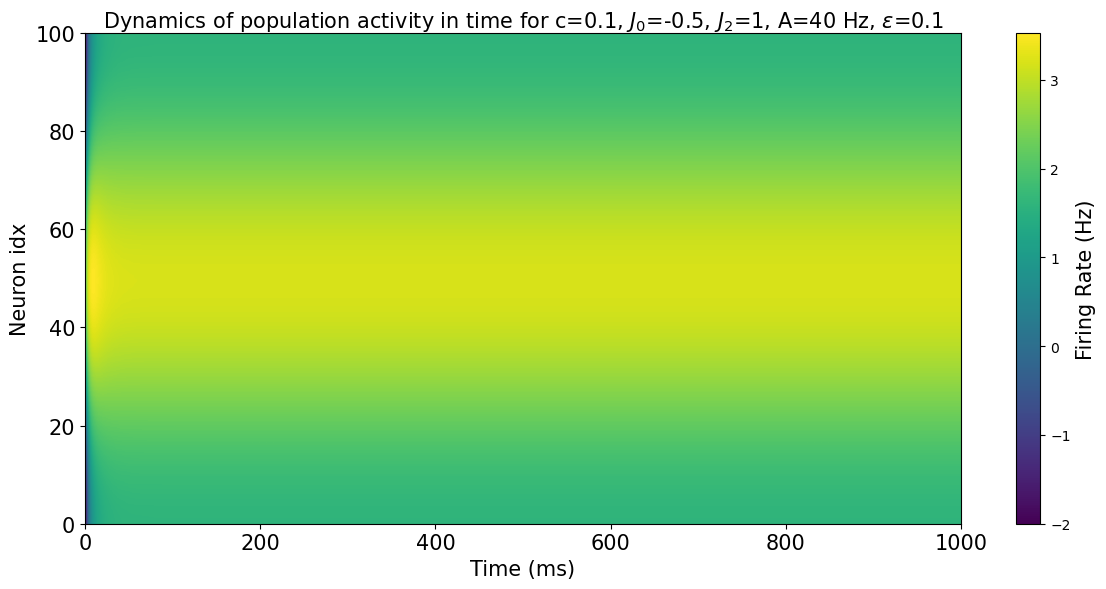

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

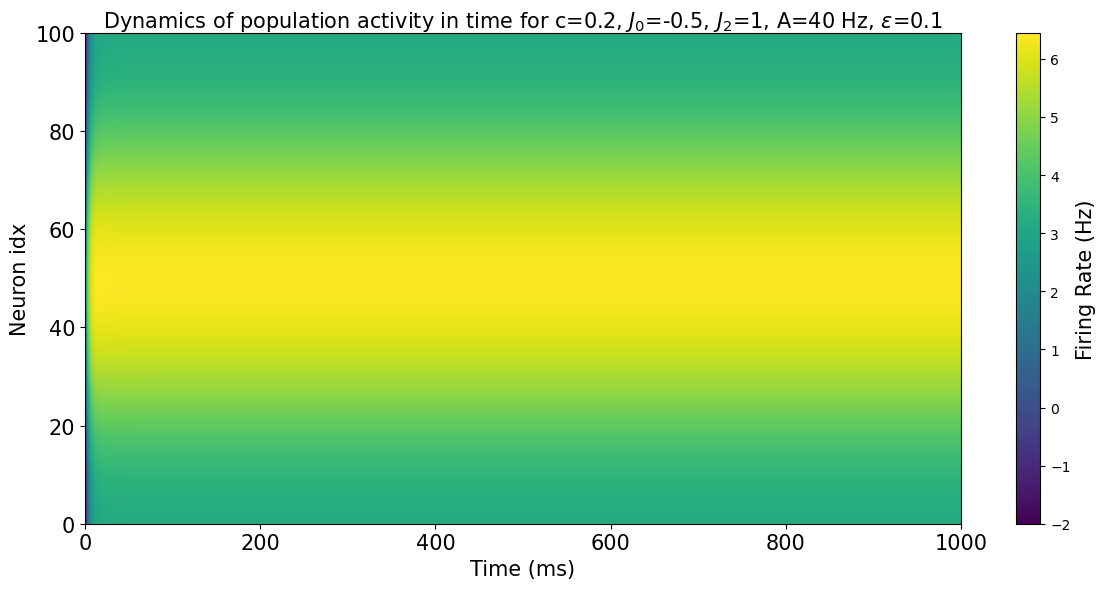

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

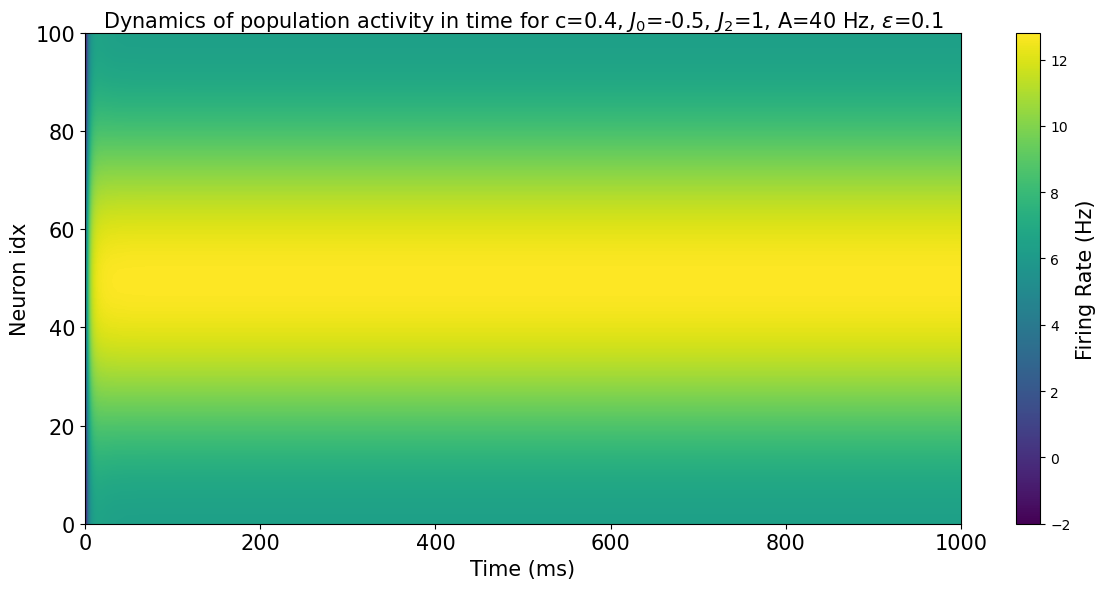

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

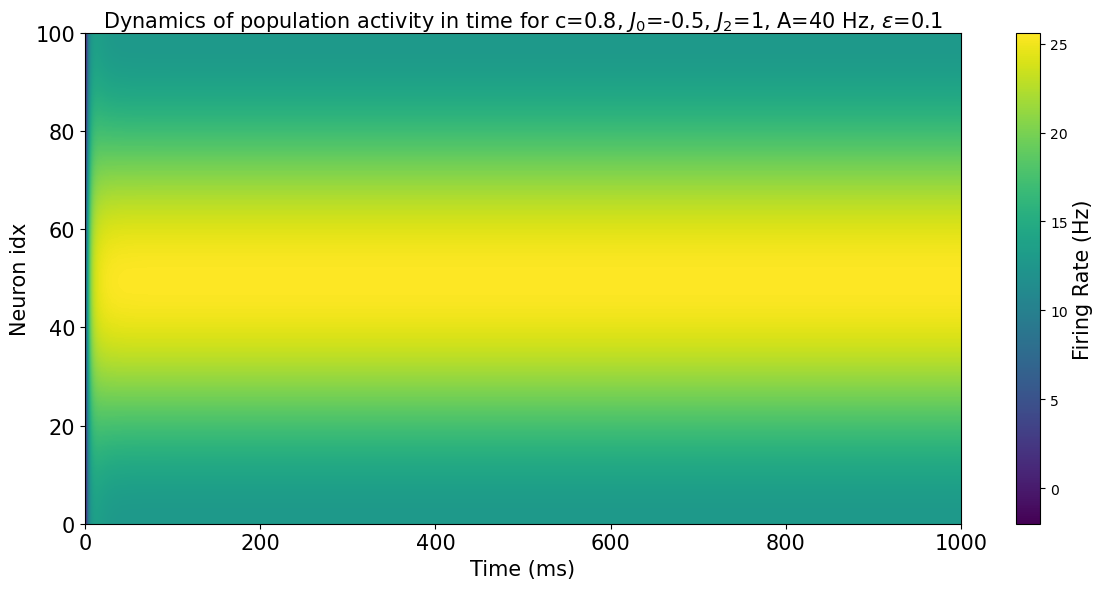

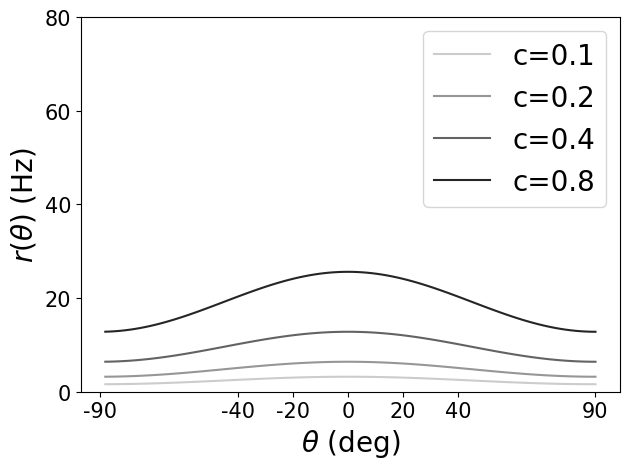

In [4]:
_ = simulate_and_plot_ring_model(
    J_0 = -0.5,
    J_2 = 1,
    A = 40, # Hz
    epsilon = 0.1,
    total_time=1000 # ms
)

## Question 2

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

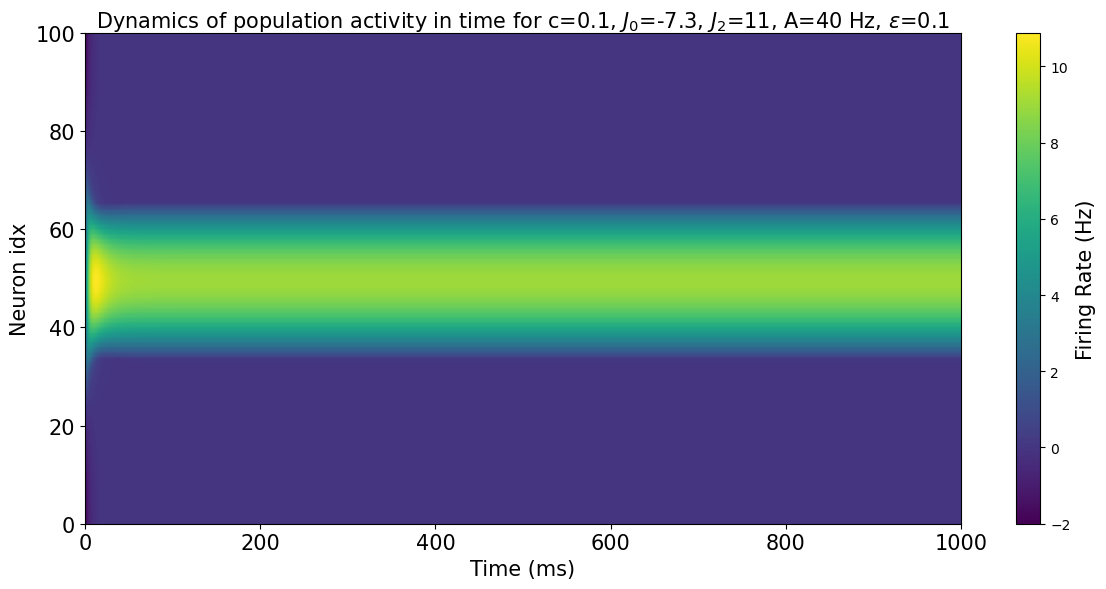

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

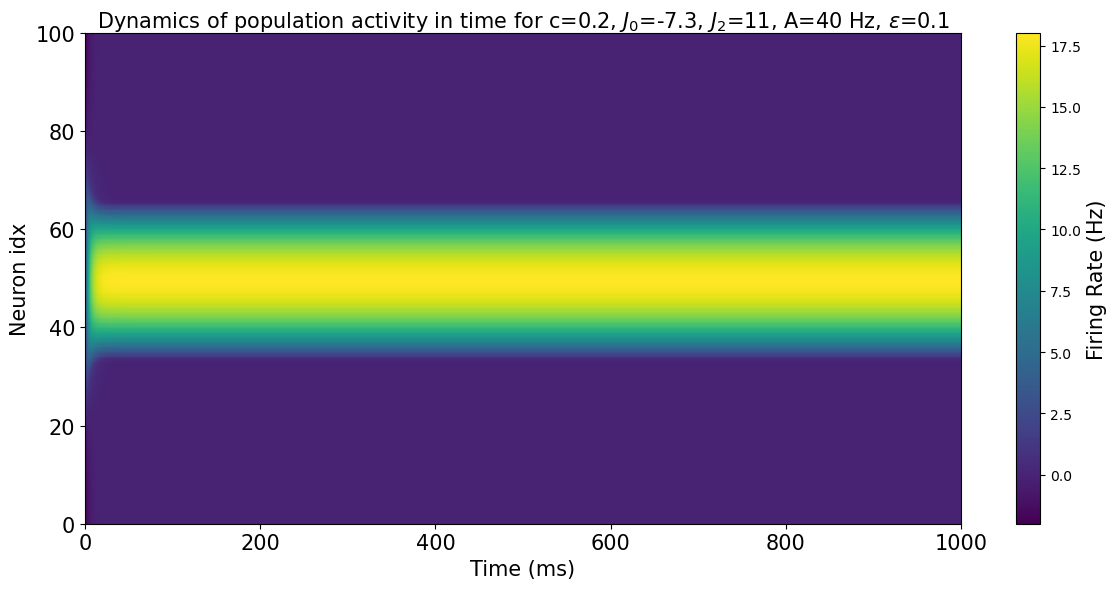

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

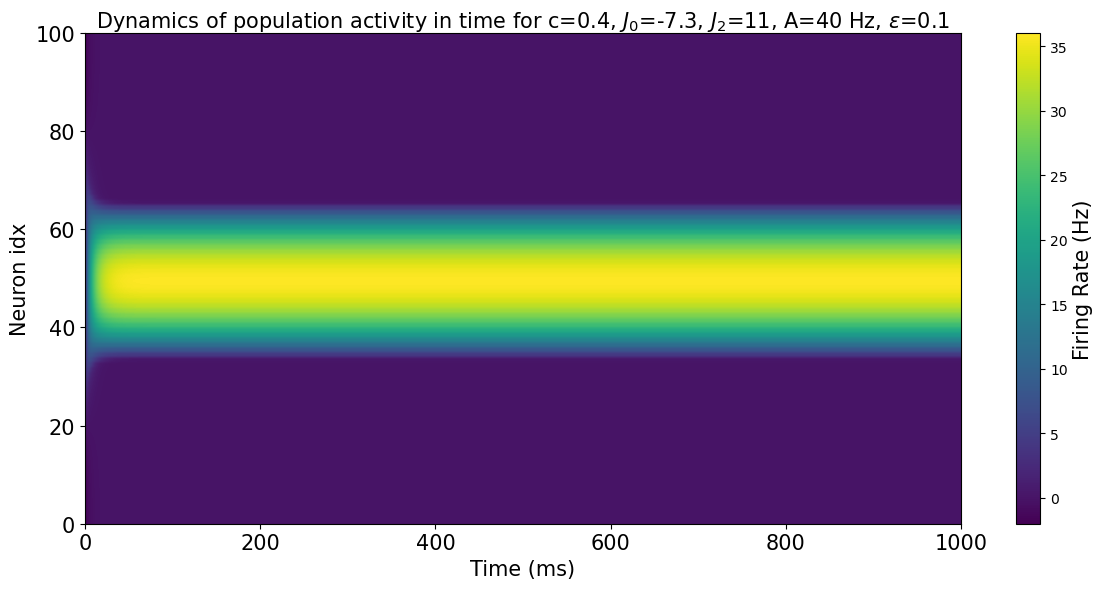

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

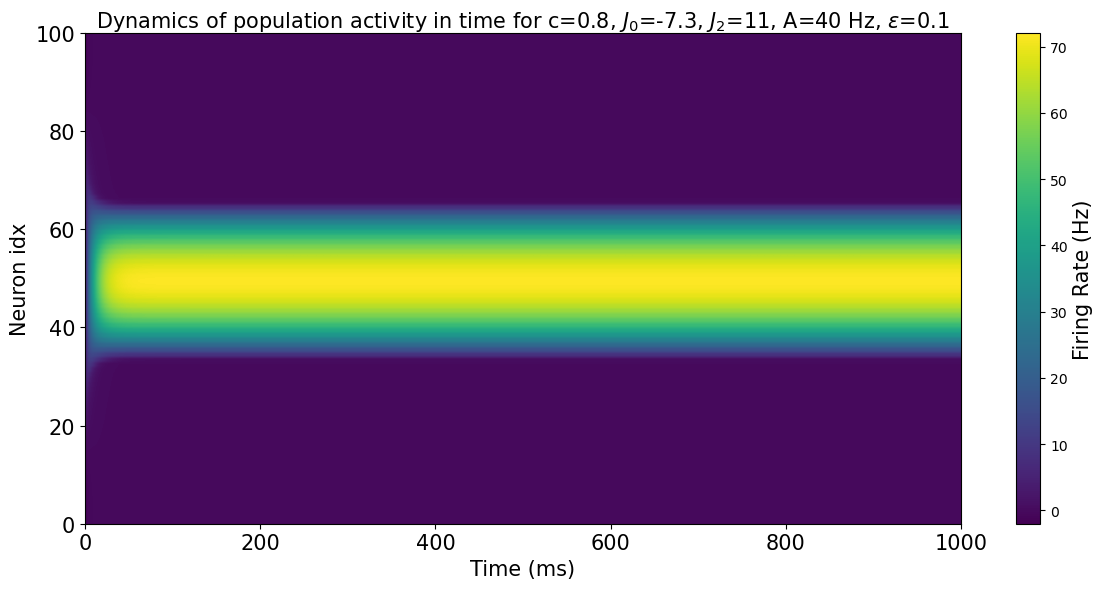

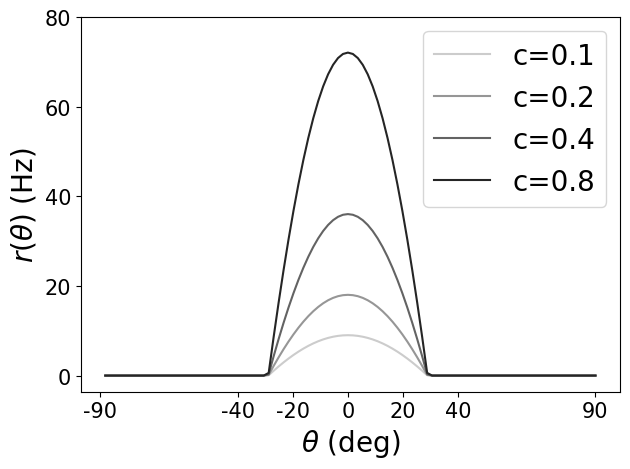

In [5]:
_ = simulate_and_plot_ring_model(
    J_0 = -7.3,
    J_2 = 11,
    A = 40, # Hz
    epsilon = 0.1,
    total_time=1000 # ms
)

## Auxiliary plots

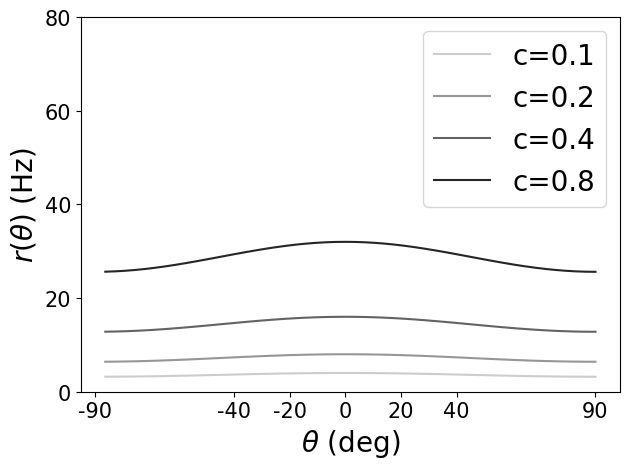

In [6]:
fig, axs = plt.subplots(tight_layout = True)
colors = {0.1: "#cccccc", 0.2: "#969696", 0.4: "#636363", 0.8: "#252525"}
contrasts = [0.1, 0.2, 0.4, 0.8]
num_of_neurons = 50
indices = np.arange(1, num_of_neurons + 1)
A = 40
epsilon = 0.1
thetas_i = np.pi / num_of_neurons * indices - 0.5 * np.pi
for c in contrasts:
    axs.plot(thetas_i * 180 / np.pi, compute_thalamic_input(thetas_i, c, epsilon, A), label=f"c={c}", c=colors[c])
axs.set_xticks([-90, -40, -20, 0, 20, 40, 90], [-90, -40, -20, 0, 20, 40, 90])
axs.set_yticks([0, 20, 40, 60, 80], [0, 20, 40, 60, 80])
axs.set_xlabel(r'$\theta$ (deg)', fontsize=20)
axs.set_ylabel(r'$r(\theta)$ (Hz)', fontsize=20)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)
axs.legend(fontsize=20)
output_dir = './plots/'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, f'thalamic_input_A_{A}_epsilon_{epsilon}.png'), dpi=300)
plt.show()

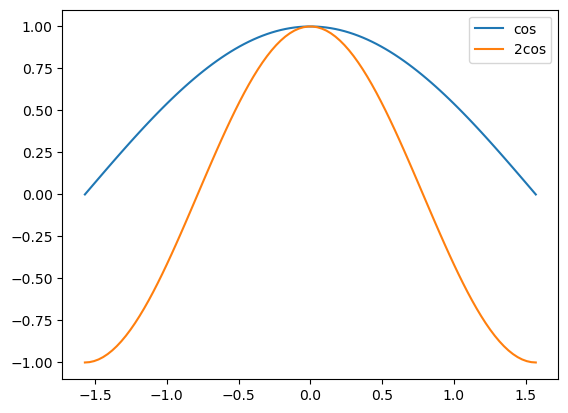

In [7]:
input = np.linspace(-np.pi/2, np.pi/2, 100)
plt.plot(input, np.cos(input), label='cos')
plt.plot(input, np.cos(2 * input), label='2cos')
plt.legend()
plt.show()


## Plotting tuning curves

In [8]:
contrasts = [0.1, 0.2, 0.4, 0.8]
num_of_neurons = 100
indices = np.arange(1, num_of_neurons + 1)
stimulus_orientations = np.linspace(-np.pi/2, np.pi/2, 15)  
tuning_curves = {c: np.zeros(shape=(num_of_neurons, len(stimulus_orientations))) for c in contrasts}
with tqdm(stimulus_orientations, desc="Input orientation") as orientation:
    for idx, theta_cue in enumerate(orientation):
        response = simulate_and_plot_ring_model(
                    theta_cue = theta_cue,
                    J_0 = -7.3,
                    J_2 = 11,
                    A = 40, # Hz
                    epsilon = 0.1,
                    total_time=1000, # ms
                    plot_and_savefigs = False
                    )
        for c in contrasts:
            tuning_curves[c][:, idx] = response[c]

Input orientation:   0%|          | 0/15 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

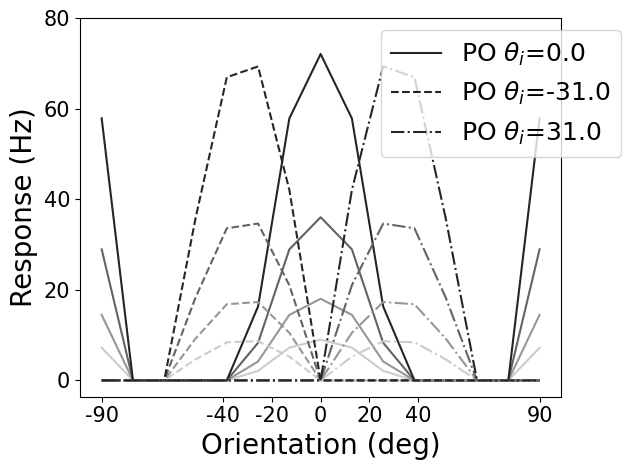

In [33]:
fig, axs = plt.subplots(tight_layout=True)
thetas_i = np.pi / num_of_neurons * indices - 0.5 * np.pi
neuron_indices = [
    np.argmin(np.abs(thetas_i * 180 / np.pi- 0)),
    np.argmin(np.abs(thetas_i * 180 / np.pi + 30)),
    np.argmin(np.abs(thetas_i * 180 / np.pi - 30)),
]
linestyles = ['solid', 'dashed',  'dashdot']

colors = {0.1: "#cccccc", 0.2: "#969696", 0.4: "#636363", 0.8: "#252525"}
for idx, neuron_idx in enumerate(neuron_indices):
    for c in contrasts:
        label = None
        if c == 0.8:
            label=r"PO $\theta_{i}$=" + f"{round(thetas_i[neuron_idx] * 180 / np.pi, 0)}"
        axs.plot(stimulus_orientations * 180 / np.pi, tuning_curves[c][neuron_idx, :], c=colors[c], linestyle=linestyles[idx], label = label)
            

axs.set_xticks(stimulus_orientations * 180 / np.pi, np.round(stimulus_orientations * 180 / np.pi, 0))
axs.set_yticks([0, 20, 40, 60, 80], [0, 20, 40, 60, 80])
axs.set_xticks([-90, -40, -20, 0, 20, 40, 90], [-90, -40, -20, 0, 20, 40, 90])
axs.set_xlabel(r'Orientation (deg)', fontsize=20)
axs.set_ylabel(r'Response (Hz)', fontsize=20)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)
axs.legend(fontsize=18,  bbox_to_anchor=[0.6, 0.6])
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, f'tuning_curves_b.png'), dpi=300)
plt.show()

Input orientation:   0%|          | 0/15 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

Timestep:   0%|          | 0/100001 [00:00<?, ?it/s]

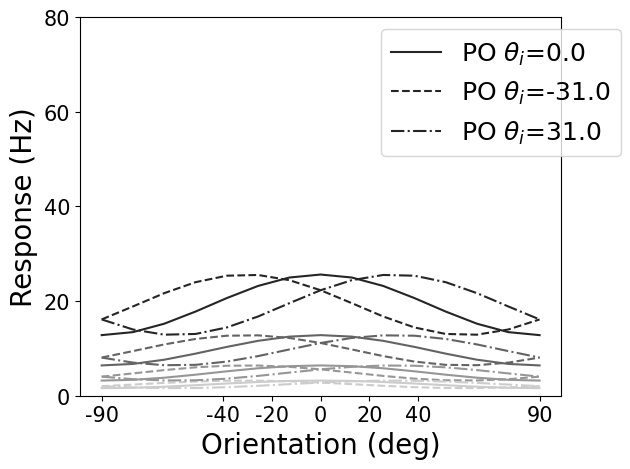

In [34]:
contrasts = [0.1, 0.2, 0.4, 0.8]
num_of_neurons = 100
indices = np.arange(1, num_of_neurons + 1)
stimulus_orientations = np.linspace(-np.pi/2, np.pi/2, 15)  
tuning_curves = {c: np.zeros(shape=(num_of_neurons, len(stimulus_orientations))) for c in contrasts}
with tqdm(stimulus_orientations, desc="Input orientation") as orientation:
    for idx, theta_cue in enumerate(orientation):
        response = simulate_and_plot_ring_model(
                    theta_cue = theta_cue,
                    J_0 = -0.5,
                    J_2 = 1,
                    A = 40, # Hz
                    epsilon = 0.1,
                    total_time=1000, # ms
                    plot_and_savefigs = False
                    )
        for c in contrasts:
            tuning_curves[c][:, idx] = response[c]

fig, axs = plt.subplots(tight_layout=True)
thetas_i = np.pi / num_of_neurons * indices - 0.5 * np.pi
neuron_indices = [
    np.argmin(np.abs(thetas_i * 180 / np.pi- 0)),
    np.argmin(np.abs(thetas_i * 180 / np.pi + 30)),
    np.argmin(np.abs(thetas_i * 180 / np.pi - 30)),
]
linestyles = ['solid', 'dashed',  'dashdot']

colors = {0.1: "#cccccc", 0.2: "#969696", 0.4: "#636363", 0.8: "#252525"}
for idx, neuron_idx in enumerate(neuron_indices):
    for c in contrasts:
        label = None
        if c == 0.8:
            label=r"PO $\theta_{i}$=" + f"{round(thetas_i[neuron_idx] * 180 / np.pi, 0)}"
        axs.plot(stimulus_orientations * 180 / np.pi, tuning_curves[c][neuron_idx, :], c=colors[c], linestyle=linestyles[idx], label = label)
            

axs.set_xticks(stimulus_orientations * 180 / np.pi, np.round(stimulus_orientations * 180 / np.pi, 0))
axs.set_yticks([0, 20, 40, 60, 80], [0, 20, 40, 60, 80])
axs.set_xticks([-90, -40, -20, 0, 20, 40, 90], [-90, -40, -20, 0, 20, 40, 90])
axs.set_xlabel(r'Orientation (deg)', fontsize=20)
axs.set_ylabel(r'Response (Hz)', fontsize=20)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)
axs.legend(fontsize=18,  bbox_to_anchor=[0.6, 0.6])
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, f'tuning_curves_a.png'), dpi=300)
plt.show()

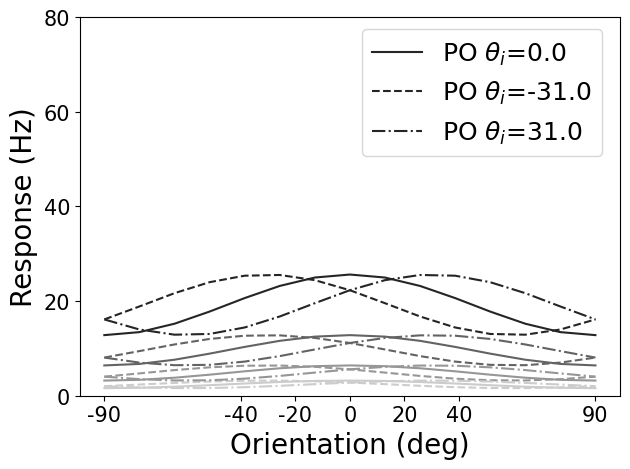

In [38]:
fig, axs = plt.subplots(tight_layout=True)
thetas_i = np.pi / num_of_neurons * indices - 0.5 * np.pi
neuron_indices = [
    np.argmin(np.abs(thetas_i * 180 / np.pi- 0)),
    np.argmin(np.abs(thetas_i * 180 / np.pi + 30)),
    np.argmin(np.abs(thetas_i * 180 / np.pi - 30)),
]
linestyles = ['solid', 'dashed',  'dashdot']

colors = {0.1: "#cccccc", 0.2: "#969696", 0.4: "#636363", 0.8: "#252525"}
for idx, neuron_idx in enumerate(neuron_indices):
    for c in contrasts:
        label = None
        if c == 0.8:
            label=r"PO $\theta_{i}$=" + f"{round(thetas_i[neuron_idx] * 180 / np.pi, 0)}"
        axs.plot(stimulus_orientations * 180 / np.pi, tuning_curves[c][neuron_idx, :], c=colors[c], linestyle=linestyles[idx], label = label)
            

axs.set_xticks(stimulus_orientations * 180 / np.pi, np.round(stimulus_orientations * 180 / np.pi, 0))
axs.set_yticks([0, 20, 40, 60, 80], [0, 20, 40, 60, 80])
axs.set_xticks([-90, -40, -20, 0, 20, 40, 90], [-90, -40, -20, 0, 20, 40, 90])
axs.set_xlabel(r'Orientation (deg)', fontsize=20)
axs.set_ylabel(r'Response (Hz)', fontsize=20)
axs.xaxis.set_tick_params(labelsize=15)
axs.yaxis.set_tick_params(labelsize=15)
axs.legend(fontsize=18,  bbox_to_anchor=[0.5, 0.6])
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, f'tuning_curves_a.png'), dpi=300)
plt.show()